# Evaluation of Reconstruction in 3D

## Imports

In [9]:
import matplotlib.pyplot as plt
import os
import glob
from scipy import ndimage


from Utils import *

## Definitions

In [10]:
MRC = ".mrc"
RAW = ".raw"
TIF = ".tif"

gt_path = r"./_Data\Synthetic\PhantomVolume/"
gt_format = RAW

vol_path = r"./_Reconstructions\Synthetic\_MainPaper\Ours\Volume/"
vol_format = RAW

save_to = vol_path+"/Evaluation/"

voxel_type_gt = 'uint8' #'uint16'
voxel_type_model = 'uint8' #'uint16'


## Load Tomorams

In [11]:
vol_path = glob.glob(vol_path+"/*"+vol_format)[0]
print("Volume Path: "+str(vol_path))

os.makedirs(save_to, exist_ok=True)

Volume Path: C:\Users\Hannah\Documents\ABEM\_SW\CVPR_GIT_new\Reconstruction_Data\_Data\Synthetic\PhantomVolume\volume.raw


In [12]:
if(vol_format == MRC):
    volume = open_mrc(vol_path)
elif(vol_format == TIF):
    volume = open_tif_stack(vol_path)
else: 
    volume = open_raw(vol_path, voxel_type_model)
volume = min_max(volume)
print("Volume init shape: "+str(volume.shape))

if(gt_format == MRC):
    volume_gt = open_mrc(gt_path)
elif(gt_format == TIF):
    volume_gt = open_tif_stack(gt_path)
else: 
    volume_gt = open_raw(gt_path, voxel_type_gt)
volume_gt = min_max(volume_gt)
print("GT init shape: "+str(volume_gt.shape))

C:\Users\Hannah\Documents\ABEM\_SW\CVPR_GIT_new\Reconstruction_Data\_Data\Synthetic\PhantomVolume\volume.raw
C:\Users\Hannah\Documents\ABEM\_SW\CVPR_GIT_new\Reconstruction_Data\_Data\Synthetic\PhantomVolume\volume.raw
Max loaded data: 255
Volume init shape: (1000, 1000, 1000)
C:\Users\Hannah\Documents\ABEM\_SW\CVPR_GIT_new\Reconstruction_Data\_Data\Synthetic\PhantomVolume/
C:\Users\Hannah\Documents\ABEM\_SW\CVPR_GIT_new\Reconstruction_Data\_Data\Synthetic\PhantomVolume/
['C:\\Users\\Hannah\\Documents\\ABEM\\_SW\\CVPR_GIT_new\\Reconstruction_Data\\_Data\\Synthetic\\PhantomVolume\\volume.raw']
Max loaded data: 255
GT init shape: (1000, 1000, 1000)


## Rescale 

In [5]:
if(volume.shape != volume_gt.shape):
    scale = volume.shape[0]/volume_gt.shape[0]
    save_shape = volume_gt.shape
    volume_gt = ndimage.zoom(volume_gt, scale)
    volume_gt = np.clip(volume_gt, 0, 1)

    print("Rescaled GT volume from shape: "+str(save_shape)+" to shape: "+str(volume_gt.shape))

Rescaled GT volume from shape: (1000, 1000, 1000) to shape: (512, 512, 512)


## Show central volume slices

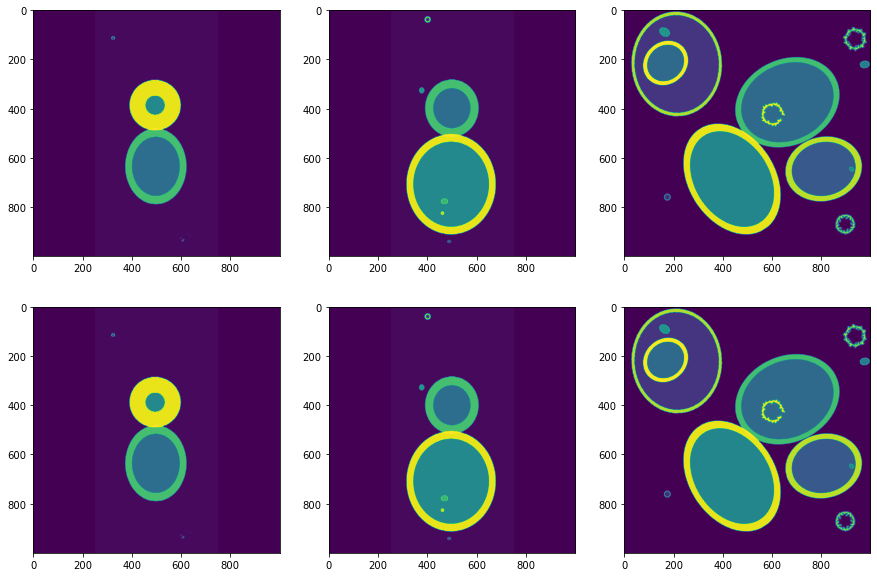

In [13]:
m_vol = volume.shape[0]//2
m_gt = volume_gt.shape[0]//2

fig, axs = plt.subplots(2,3, figsize=(15,10))
axs[0,0].imshow(volume[m_vol,:,:])
axs[1,0].imshow(volume_gt[m_gt,:,:])

axs[0,1].imshow(volume[:,m_vol,:])
axs[1,1].imshow(volume_gt[:,m_gt,:])

axs[0,2].imshow(volume[:,:,m_vol])
axs[1,2].imshow(volume_gt[:,:,m_gt])

plt.show()

### The Volume probably needs to be transposed/inverted in order to match the GT

In [6]:
# volume = volume.transpose(1,0,2)
# volume = 1 - volume

## Compute Metrics

In [25]:
psnr_val = psnr(volume_gt, volume, slices = False)
mse_val = mse(volume_gt, volume, slices = False)

eval_str = "PSNR: "+str(psnr_val)+" | MSE: "+str(mse_val)
print(eval_str)

PSNR: (23.31286651441093, 0) | MSE: (0.0046635146839533416, 0)


In [19]:
f = open(save_to+"/eval.txt", "w")
f.write(eval_str)
f.close()

In [20]:
save_raw(r"C:\Users\Hannah\Documents\ABEM\_SW\CVPR_GIT\Implicit-Electron-Tomography\Tomograms\Synthetic\512\L2Noisy_Explicit/" ,volume)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Hannah\\Documents\\ABEM\\_SW\\CVPR_GIT\\Implicit-Electron-Tomography\\Tomograms\\Synthetic\\512\\L2Noisy_Explicit//volume.raw'

In [31]:
# save_tif_stack(1-volume, r"C:\Users\Hannah\Documents\ABEM\_SW\CVPR_GIT\Implicit-Electron-Tomography\Tomograms\Synthetic\512\L2Noisy_TVExplicit/TIF/")

512it [00:00, 515.92it/s]
